# Introduction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import missingno as msno
import requests
import json
import pprint

## importation bilbliothèque

In [ ]:
import pandas as pd

# Charger un fichier CSV
df = pd.read_csv('nom_du_fichier.csv')

# Charger un fichier Excel
df = pd.read_excel('nom_du_fichier.xlsx')

## Sauvegarde

In [ ]:
df.to_csv('nouveau_fichier.csv', index=False)       # Sauvegarder sans index
df.to_excel('nouveau_fichier.xlsx', index=False)    # Sauvegarder en Excel

## Vue d'ensemble

In [ ]:
df.head()       # Affiche les 5 premières lignes (modifiable avec .head(10))
df.tail()       # Affiche les 5 dernières lignes
df.sample()     # Affiche le contenu de manière aléatoire.
df.info()       # Donne des informations sur le type de données et les valeurs manquantes
df.describe()   # Statistiques descriptives pour les colonnes numériques
df.shape            # Renvoie le nombre de lignes et colonnes (tuple)
df.columns          # Liste les noms de colonnes
df.index            # Affiche l'index (utile pour vérifier si un index numérique ou de date)
df.dtypes         # Affiche types variables

df_col.describe(include = object).T

## tronquage

In [ ]:
pd.set_option('display.max_colwidth', None)

## Modfication df

In [ ]:
df_col=df_col.rename(columns={"Transaction_date": "Date"}) # rename columns name

In [ ]:
# Trouvez doublons
doublons = data.duplicated().sum() #compter doublons

doublons = df_col[df_col.duplicated(keep='first')]  # keep=False pour marquer tous les doublon, 'first' première apparition, 'last' deuxième apparition

df = df.drop_duplicates() # supprimer doublons

In [ ]:
# Suppression des colonnes 'A' et 'C'
df = df.drop(['A', 'C'], axis=1)

In [ ]:
# Changer type colonne

df['startYear'] = df['startYear'].astype(int)

In [ ]:
# supressions d'une colonne

df = df.drop('B', axis=1)

## trouver colonne numérique

In [ ]:
df_num = df.select_dtypes(include=['number'])

## Supprimer colonne avec valeur unique

In [ ]:
df = df.loc[:, df.nunique() > 1]

## Calcul

In [ ]:
df['colonne'].mean() # moyenne de la colonne
df['colonne'].median() #medianne de la colonne

In [ ]:
#Calcul du coef de Pearson

correlation = df['X'].corr(df['Y'])
print("Coefficient de corrélation de Pearson:", correlation)

## Identifier les valeurs manquantes

In [ ]:
df.isna()             # renvoie un bool, True si valeur manquante
df.isnull()           # Vérifie les valeurs manquantes, et renvoie un booléen.
df.isnull().sum()     # Compte les valeurs manquantes par colonne

## Supprimer/Remplir les valeurs manquantes

In [ ]:
lignenulles = data[data.isnull().any(axis=1)] #identifier tout mes lignes avec des valeurs manquante
colvalnull = data.isna().sum() #nulle par colonne

In [ ]:
df.dropna()               # Supprime les lignes avec valeurs manquantes
df.fillna(0)              # Remplit les valeurs manquantes avec un nombre (ex. 0)
df['colonne'].fillna(df['colonne'].mean())  # Remplace les valeurs manquantes par la moyenne

In [ ]:
# Supprimer les lignes où 'colonne1' est vide (NaN)
df = df.dropna(subset=['colonne1'])

In [ ]:
# Afin de stocker ta modification, tu dois ajouter l'argument inplace.
dataframe['column_X'].fillna("test", inplace = True)

- Dans pandas, la méthode **fillna()** est utilisée pour remplir les valeurs manquantes (NaN) dans un DataFrame ou une série. Les arguments method='ffill' et method='bfill' spécifient comment les valeurs manquantes doivent être remplies.

**method=ffill** : Remplit les NaN avec la dernière valeur non manquante qui les précède (propagation vers l'avant).


**method=bfill*** : Remplit les NaN avec la prochaine valeur non manquante qui les suit (propagation vers l'arrière).

In [ ]:
import pandas as pd

# Création d'une série avec des valeurs manquantes
s = pd.Series([1, 2, None, 4, None, 6])

# Remplissage des valeurs manquantes avec 'ffill'
s_ffill = s.fillna(method='ffill')
print(s_ffill)

0    1.0
1    2.0
2    2.0
3    4.0
4    4.0
5    6.0
dtype: float64


<ipython-input-8-8106bc01e864>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  s_ffill = s.fillna(method='ffill')


In [ ]:
import pandas as pd

# Création d'une série avec des valeurs manquantes
s = pd.Series([1, 2, None, 4, None, 6])

# Remplissage des valeurs manquantes avec 'bfill'
s_bfill = s.fillna(method='bfill')
print(s_bfill)

0    1.0
1    2.0
2    4.0
3    4.0
4    6.0
5    6.0
dtype: float64


<ipython-input-9-6971d39a16b6>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  s_bfill = s.fillna(method='bfill')


## Indexing ou Slicing

- Selectionner

In [ ]:
df['colonne']          # Sélection d'une colonne
df[['colonne1', 'colonne2']]    # Sélection de plusieurs colonnes

- Selectionner des lignes par index

In [ ]:
df.iloc[0:5]           # Par index (lignes 0 à 4)
df.loc[0:5]            # Par label (lignes avec labels 0 à 5)

- Filtrer avec condition

In [ ]:
df[df['colonne'] > 10]  # Filtrer les lignes où 'colonne' > 10
df[(df['colonne1'] > 5) & (df['colonne2'] == 'valeur')]  # Plusieurs conditions
df['colonne'].str.contains('mot')       # Filtre si 'mot' est dans la colonne

- .set_index()

Définissez l'index du DataFrame (étiquettes de ligne) à l'aide d'une ou plusieurs colonnes ou tableaux existants (de la longueur correcte). L'index peut remplacer l'index existant ou l'étendre.

In [ ]:
df_2=df_1.set_index('country')

## Aggrégation et grouppement de donnés

- comptage simple

In [ ]:
df['colonne'].value_counts()    # Compte occurrences pour chaque valeur unique

- GroupBy pour stat par groupe

In [ ]:
df.groupby('colonne').mean()    # Moyenne par groupe
df.groupby('colonne').agg({'colonne2': 'sum', 'colonne3': 'mean'})  # Plusieurs agg

# .agg() permet des calculs multiples, par exemple {'col1': 'mean', 'col2': 'sum'}.

## Manipulation de texte

In [ ]:
df['colonne'].str.lower()       # Convertit en minuscules
df['colonne'].str.upper()       # Convertit en majuscules
df['colonne'].str.contains('mot')       # Filtre si 'mot' est dans la colonne
df['colonne'].str.replace('ancien', 'nouveau')  # Remplace occurrences

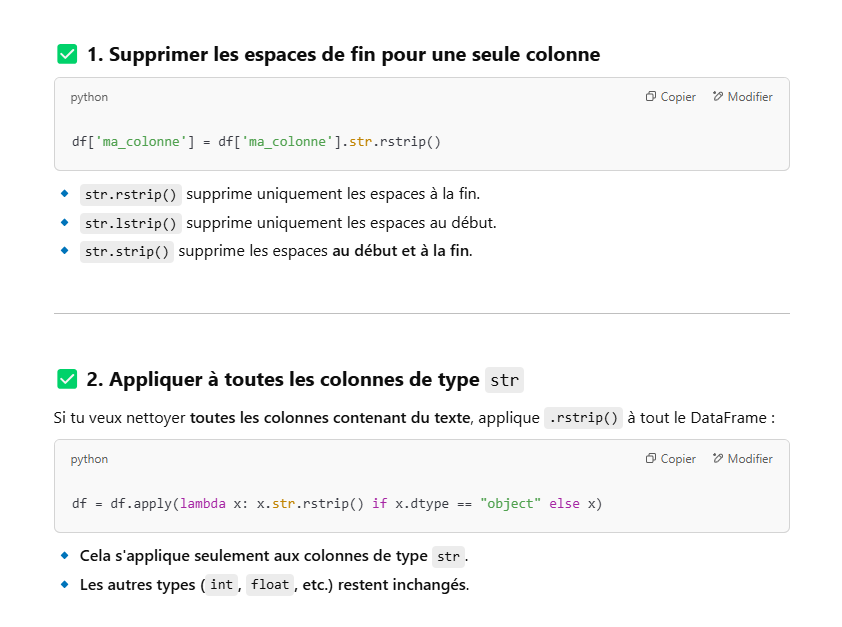

In [ ]:
# Nettoyer espace début fin de toute les colonnes objets

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

## Tri et organisation de données

In [ ]:
# Tri valeur

df.sort_values(by='colonne', ascending=True)    # Ascendant
df.sort_values(by=['col1', 'col2'], ascending=[True, False])  # Trier par plusieurs colonnes

# Tri colonne

df = df[['col3', 'col1', 'col2']]      # Réorganiser l’ordre des colonnes

## DATE

https://docs.python.org/3/library/datetime.html#

La plus simple est d'utiliser la fonction intégrée de pandas

In [ ]:
# Le plus simple
pd.to_datetime(df['DATE'])

C'est très simple, mais si votre colonne n'est pas standard, il est difficile d'adapter le format.

Une solution plus complète, est d'utiliser l'ancienne bibliothèque datetime. Ainsi, vous pouvez personnaliser le format comme vous le souhaitez:

In [ ]:
from datetime import datetime

In [ ]:
# 2e option
df['DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
#extraire une année
df['DATE'].apply(lambda x: x.year)

Calcul mathématique Date

ex : donner le jour qu'il sera dans 4j

In [ ]:
from datetime import timedelta
print(datetime.now() + timedelta(days=4))

- extraire jour de la semaine

In [ ]:
# Conversion en format datetime                          En anglais
df['date'] = pd.to_datetime(df['date'])

# Extraire le jour de la semaine en texte
df['jour_semaine'] = df['date'].dt.day_name()
                                                            # En français
df['jour_semaine'] = df['date'].dt.day_name(locale="fr")

-*e*

# Création de Dataframe

- creation df à partir d'une liste

In [ ]:
import pandas as pd

list_name = [[30,21]]

tableau_fruit = pd.DataFrame(list_name, columns=['Apples','Bananas'])
print(tableau_fruit)

   Apples  Bananas
0      30       21


- creation df à partir d'un dictionnaire

In [ ]:
import pandas as pd

data = {'2017 Sales': [35, 21], '2018 Sales': [41,34]}


df1 = pd.DataFrame.from_dict(data, orient='index',columns=['Apples', 'Bananas'])
print(df1)

            Apples  Bananas
2017 Sales      35       21
2018 Sales      41       34


- supprimer une ligne

In [ ]:
data = {'2017 Sales': [35, 21], '2018 Sales': [41,34]}
df1 = pd.DataFrame.from_dict(data, orient='index',columns=['Apples', 'Bananas'])
dfsup=df1.drop(index=df1.index[0])
print(dfsup)

            Apples  Bananas
2018 Sales      41       34


- supprimer colonne

In [ ]:
data = {'2017 Sales': [35, 21], '2018 Sales': [41,34]}
df1 = pd.DataFrame.from_dict(data, orient='index',columns=['Apples', 'Bananas'])
dfsup2=df1.drop(columns=['Apples'])
print(dfsup2)

# Value_counts()

Renvoie une série contenant la fréquence de chaque ligne distincte dans le Dataframe.

**DataFrame.value_counts(subset=None, normalize=False, sort=True, ascending=False, dropna=True)**

**subset** : (optionnel)

Colonnes à utiliser lors du comptage de combinaisons uniques

**normalize** (default False) :

Renvoyer des proportions plutôt que des fréquences.

**sort** (default True):

Trier par fréquences lorsque la valeur est True. Trier par valeurs de colonne DataFrame lorsque la valeur est False.

**ascending** (default False):

Trier par ordre croissant.


**dropna** (default True) :

N'incluez pas le nombre de lignes contenant des valeurs NA.

# ixmin(), ixmax(), .mode()

In [ ]:
de.x.mode()  # mode() valeur qui apparait le plus de fois

In [ ]:
df_moy = df.groupby('genre')['star_rating'].mean()  #moyenne groupe par genre
genre_min = df_moy.idxmin()  # on index le genre avec la moyenne le plus petit (donne : 'Thriller)
                            # si on avait utilisé min on aurai eu 7.68 (moyenne du groupe et non le genre)

df[df['genre']==genre_min]

In [ ]:
df['actors_list'].value_counts().idxmax() #parmis la liste d'acteur on l'idmax sera la valeur la plus grand (ici acteur qui apparait le plus de fois)

# Merge

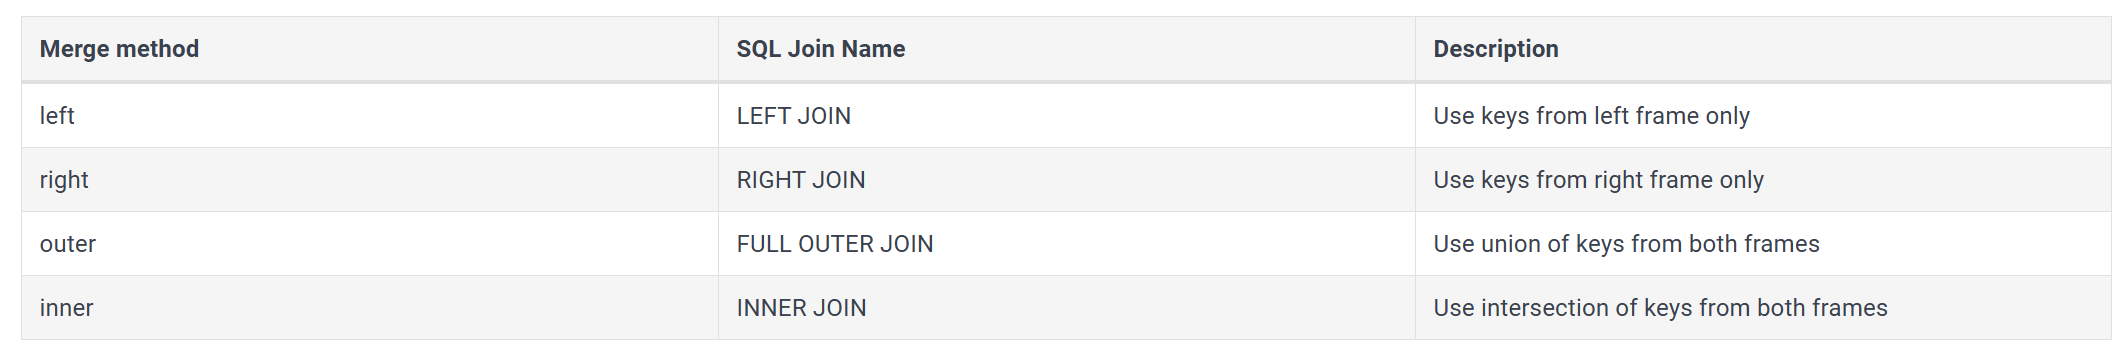

In [ ]:
# Jointure pandas

pd.merge(df_left,
         df_right,
         how="left",
         left_on='column_name_left',
         right_on='column_name_right')

# Jointure SQL

select *
from df_left
left join df_right on column_name_left = column_name_right

In [ ]:
### ATTENTION colonne de liaison on le meme nom

pd.merge(left, right, how='left', on=['key1', 'key2'])

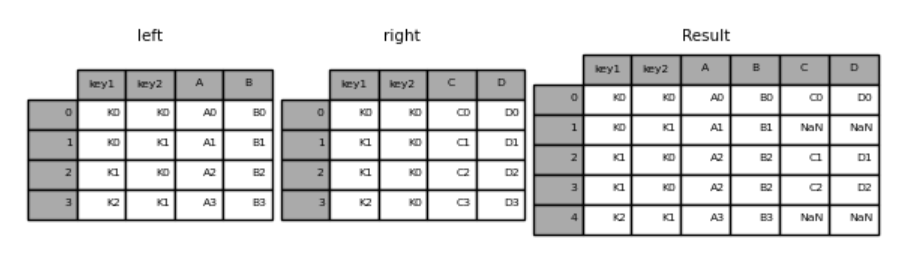

# Concat

Attention : le merge dans Pandas sert à fusionner sur un pivot, c'est notamment utilisé pour les colonnes. Pour joindre des lignes, le plus pratique sera de passer par les en-têtes, tu devras donc plutôt utiliser concat.

In [ ]:
pd.concat([df1, df2, df3])

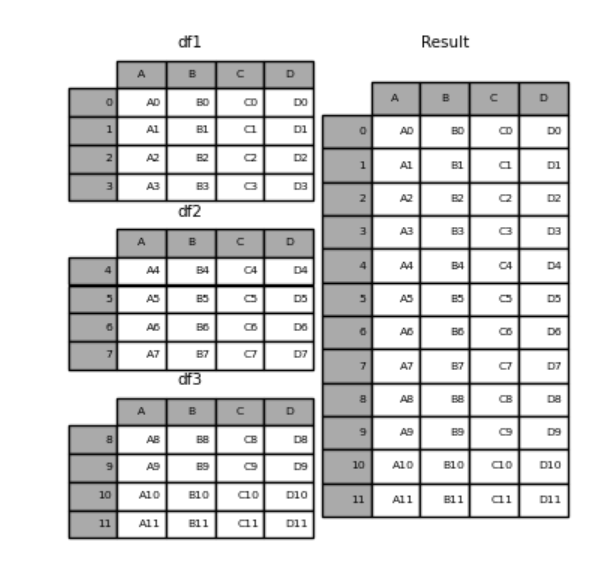

# Apply et Lambda

Les fonctions apply() et lambda en Python, en particulier dans le contexte de la bibliothèque Pandas, sont souvent utilisées ensemble pour effectuer des opérations sur des DataFrames ou des Series de manière efficace et concise. Voici une explication détaillée de chacune de ces fonctions et de leur utilisation conjointe.

- **Apply**

La méthode apply() de Pandas est utilisée pour appliquer une fonction le long d'un axe d'un DataFrame ou d'une Series. Cela permet de transformer ou d'analyser les données de manière flexible.

In [ ]:
#Syntaxe

DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)

**Paramètres principaux**

func : La fonction à appliquer. Cela peut être une fonction standard, une fonction définie par l'utilisateur ou une fonction lambda.

axis :
- 0 ou 'index' : Applique la fonction sur chaque colonne (par défaut).
- 1 ou 'columns' : Applique la fonction sur chaque ligne.

raw : Si False, la fonction est appliquée à chaque ligne ou colonne sous forme de Series. Si True, la fonction est appliquée à des tableaux NumPy.

result_type : Peut être utilisé pour spécifier comment les résultats doivent être renvoyés (par exemple, 'expand', 'reduce', 'broadcast').

- **Lambda**

Une fonction lambda est une fonction anonyme en Python. Elle est définie à l'aide du mot-clé lambda et peut prendre un nombre quelconque d'arguments, mais ne peut avoir qu'une seule expression. Les fonctions lambda sont souvent utilisées pour des opérations simples et temporaires.

In [ ]:
lambda arguments: expression

- Utilisation conjointe

In [ ]:
# Appliquer une fonction lambda sur 1 colonne

import pandas as pd

# Créer un DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Appliquer une fonction lambda pour doubler les valeurs de la colonne 'A'
df['A_doubled'] = df['A'].apply(lambda x: x * 2)

print(df)

   A  B  A_doubled
0  1  4          2
1  2  5          4
2  3  6          6


In [ ]:
# Appliquer une fonction lambda sur plusieur colonne

# Appliquer une fonction lambda pour additionner les valeurs des colonnes 'A' et 'B'
df['Sum'] = df.apply(lambda row: row['A'] + row['B'], axis=1)

print(df)

   A  B  A_doubled  Sum
0  1  4          2    5
1  2  5          4    7
2  3  6          6    9


In [ ]:
# Utiliser lambda pour des conditions

# Appliquer une fonction lambda pour créer une nouvelle colonne basée sur une condition
df['Category'] = df['A'].apply(lambda x: 'High' if x > 2 else 'Low')

print(df)

   A  B  A_doubled  Sum Category
0  1  4          2    5      Low
1  2  5          4    7      Low
2  3  6          6    9     High


# Any()

La fonction any() de la bibliothèque pandas (pd) est utilisée pour vérifier si au moins une des valeurs d'une série ou d'un DataFrame est vraie (True).

Pour un DataFrame : Si tu appliques any() sur un DataFrame, cela renverra une série avec un résultat pour chaque colonne. Chaque valeur de cette série sera True si au moins un élément de la colonne correspondante est True.

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'A': [0, 0, 0],
    'B': [0, 1, 0],
    'C': [0, 0, 0]
})
print(df.any())  # Cela renverra une série : A=False, B=True, C=False

**Détails** :

axis=0 (par défaut) :

Cela vérifie les colonnes. Si tu fais df.any(), cela renverra une série avec True pour chaque colonne si au moins une valeur dans cette colonne est vraie.

axis=1 :

Cela vérifie les lignes. Lorsque tu fais df.any(axis=1), cela renvoie une série où chaque valeur correspond à une ligne du DataFrame. Pour chaque ligne, cela renverra True si au moins une des valeurs dans cette ligne est vraie.

In [ ]:
import pandas as pd

# Création d'un DataFrame
df = pd.DataFrame({
    'A': [0, 0, 1],
    'B': [0, 1, 0],
    'C': [0, 0, 0]
})

# Vérification des valeurs vraies par ligne
resultat = df.any(axis=1)
print(resultat)

0    False
1     True
2     True
dtype: bool


# Visualisation direct avec pandas

## Scatterplot

In [ ]:
df.plot.scatter(x='A',y='B' )

##Boxplot

In [ ]:
df.boxplot(column='A')


In [ ]:
dfgenrenote['numVotes'].plot.box()

# Quantile

La méthode quantile() de pandas est utilisée pour calculer les quantiles d'un DataFrame ou d'une série. Un quantile est une valeur qui divise un ensemble de données en différentes parties. Par exemple, le 0,5 quantile (ou la médiane) divise les données en deux moitiés : 50 % des valeurs sont en dessous et 50 % sont au-dessus.

Détails :


Syntaxe de base :

DataFrame.quantile(q=0.5, axis=0, numeric_only=False)

q : C'est la valeur du quantile que tu souhaites calculer.

Par exemple :

q=0.25 pour le premier quartile (25 % des données sont en dessous)

q=0.5 pour la médiane (50 % des données sont en dessous)

q=0.75 pour le troisième quartile (75 % des données sont en dessous)

axis : Indique si tu veux calculer le quantile par colonne (axis=0, par défaut) ou par ligne (axis=1).

In [ ]:
import pandas as pd

# Création d'un DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 6, 7, 8, 9]
}
df = pd.DataFrame(data)

# Calcul du quantile à 0.5 (médiane) pour chaque colonne
mediane = df.quantile(q=0.5)
print(mediane)

In [ ]:
#exemple quête :

# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop

for i in range(0,11,1) :
  r = i/10
  print(r)
  print(df2018['WEATHER_CODE_EVENING'].quantile(q=r))

# Pivot Table

In [ ]:
df_weather.pivot_table(columns= 'OPINION',  # columns
                       index = 'MONTH',     # rows
                       values = 'MAX_TEMPERATURE_C', # values
                       aggfunc = 'mean', )  # aggregate function

# Melt()

La fonction melt() est utilisée pour transformer un DataFrame large en un DataFrame long.

La fonction melt() prend les valeurs suivantes :
- id_vars : colonnes à conserver
- value_vars : colonnes à transformer en valeurs
- var_name : nom de la nouvelle colonne pour les colonnes transformées
- value_name : nom de la nouvelle colonne pour les valeurs transformées

In [ ]:
import pandas as pd

data1 = {'Produit': ['Produit A', 'Produit A', 'Produit B', 'Produit B'],
        'Région': ['Est', 'Ouest', 'Est', 'Ouest'],
        'T1': [100, 150, 75, 120],
        'T2': [120, 180, 90, 140],
        'T3': [150, 200, 105, 160],
        'T4': [180, 220, 120, 180]}

df_produit = pd.DataFrame(data1)

pd.melt(df_produit, # source
        id_vars =['Produit','Région'], # colonnes conserver
        value_vars = ['T1','T2','T3','T4'],# colonne à transformer
        var_name= 'Trimestre', # nom new colonne
        value_name= 'Vente' )  # value_name

# Table de contingence ou Cross Table

Une table de contingence est une table qui montre la distribution des valeurs de deux variables catégorielles.

 La fonction crosstab() prend les valeurs suivantes :

 - index : colonne à utiliser comme index
 - columns : colonne à utiliser comme colonnes
 - values : colonne à aggréger
 - aggfunc : fonction d'aggrégation à appliquer aux valeurs


In [ ]:
import pandas as pd

# Création d'un DataFrame simple
data = {
    'genre': ['H', 'F', 'H', 'F', 'H', 'F', 'H', 'F'],
    'niveau_etudes': ['Licence', 'Licence', 'Master', 'Master', 'Doctorat', 'Doctorat', 'Licence', 'Doctorat']
}

df = pd.DataFrame(data)

print("DataFrame original :")
print(df)

DataFrame original :
  genre niveau_etudes
0     H       Licence
1     F       Licence
2     H        Master
3     F        Master
4     H      Doctorat
5     F      Doctorat
6     H       Licence
7     F      Doctorat


In [ ]:
# Création d'un tableau croisé
tableau_croise = pd.crosstab(df['genre'], df['niveau_etudes'], margins=True) # margins colonne ALL

print("\nTableau croisé :")
print(tableau_croise)


Tableau croisé :
niveau_etudes  Doctorat  Licence  Master  All
genre                                        
F                     2        1       1    4
H                     1        2       1    4
All                   3        3       2    8


# BUCKET

La fonction cut() permet de diviser un intervalle de valeurs en intervalles (ou "bins") définis par l'utilisateur.
Vous pouvez spécifier les limites des intervalles et le nombre d'intervalles à créer.

La fonction qcut() est similaire à cut(), mais elle divise les données en quantiles.

Cela signifie que chaque intervalle contiendra approximativement le même nombre d'observations.

 C'est utile pour créer des catégories basées sur la distribution des données.

In [ ]:
data = {'Nom du produit': ['Produit A', 'Produit B', 'Produit A', 'Produit C', 'Produit B', 'Produit A', 'Produit C', 'Produit B', 'Produit A', 'Produit C'],
        'Âge du client': [25, 35, 45, 22, 38, 50, 28, 42, 30, 46],
        'Quantité vendue': [10, 8, 12, 5, 9, 11, 6, 7, 15, 8]}
df = pd.DataFrame(data)
df['Tranche d\'âge'] = pd.cut(df['Âge du client'], bins = [18,24,34,50], labels =["18-24","25-34","35-50"])
df['Tranche d\'âge-2']=pd.qcut(df['Âge du client'], q = 4 , labels =["Q1","Q2","Q3","Q4"])
display(df)

# Explode()

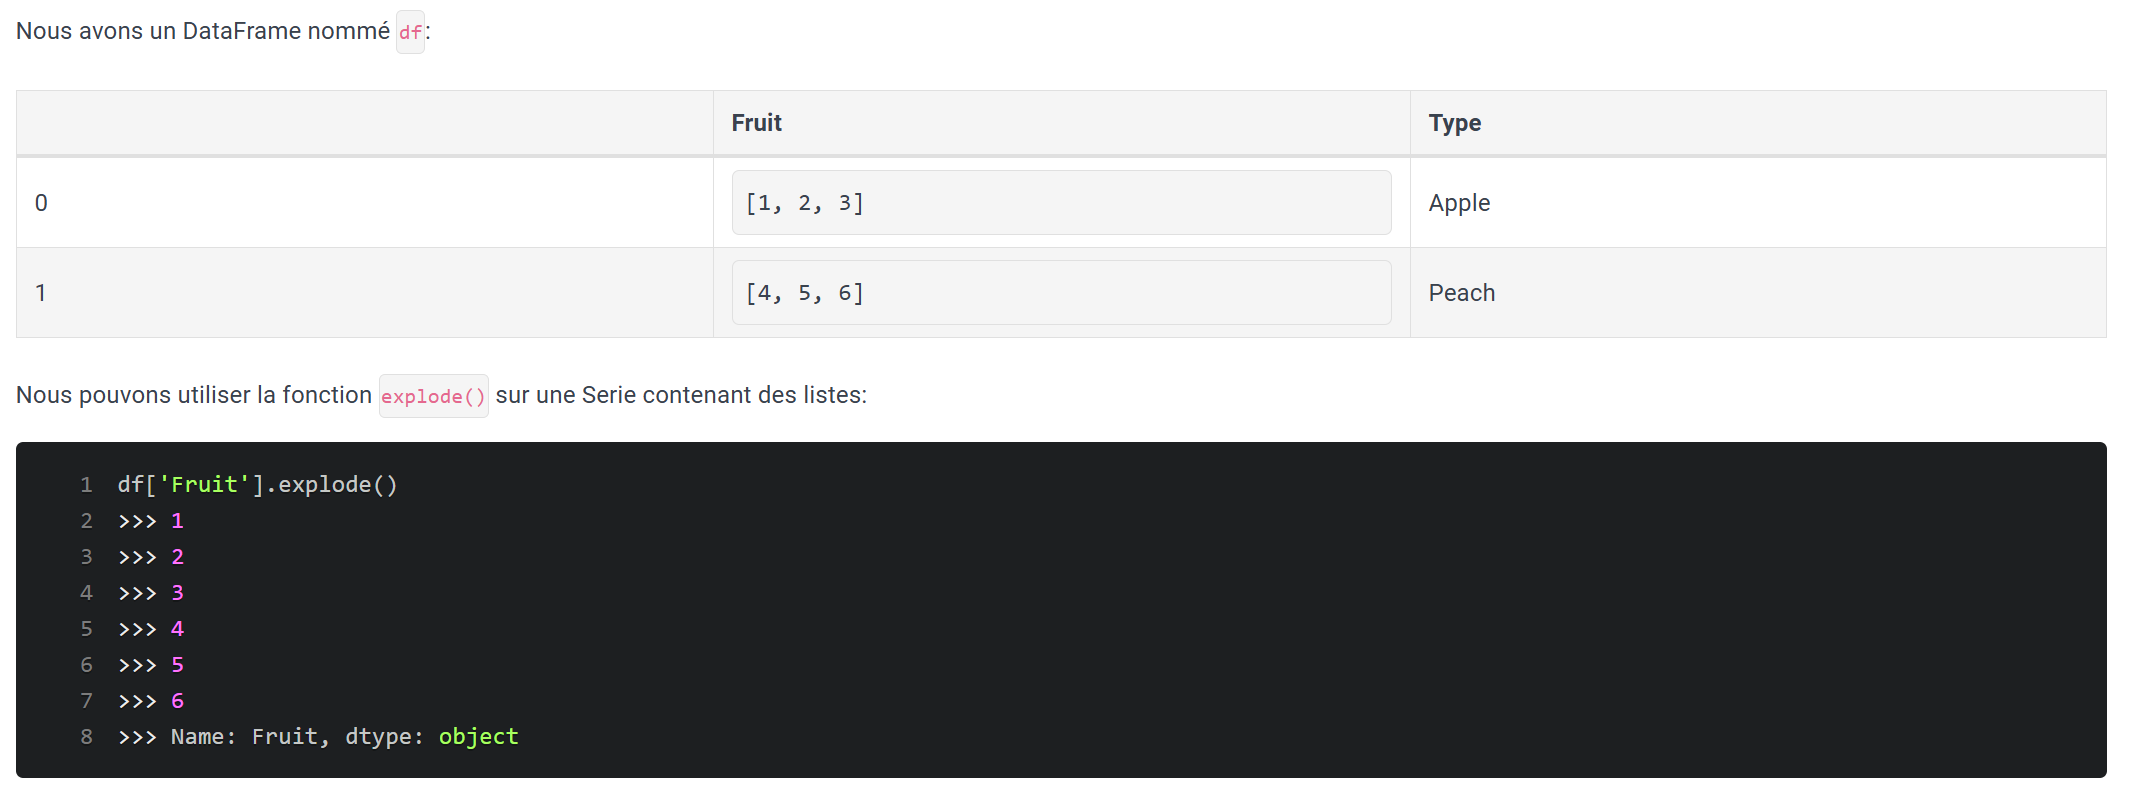

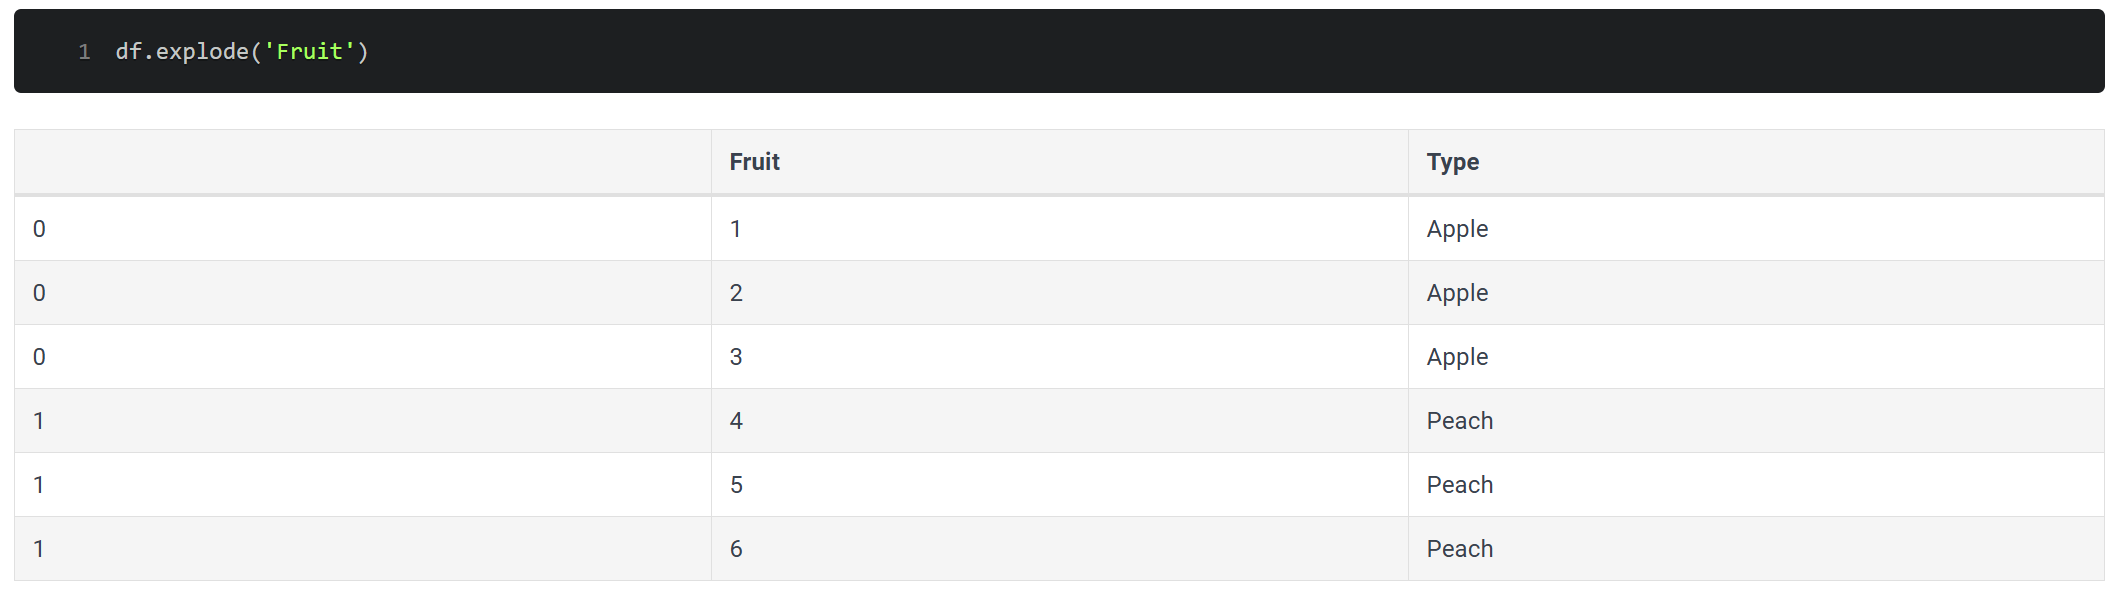

# Split et extract

In [ ]:
import pandas as pd

# Sample DataFrame
data = {'Name': ['John Doe', 'Jane Smith', 'Alice Johnson']}
df = pd.DataFrame(data)

# Splitting the 'Name' column
df['First_Name'] = df['Name'].str.split().str[0]
df['Last_Name'] = df['Name'].str.split().str[1]

print(df)

In [ ]:
df["ASRP"] = df["INFO"].str.extract(r"ASRP=(\d+)")

In [ ]:
# extraction colonne clé-valeur
cols = ["ANRP", "ANSR", "ASRP", "ASSR"]

df[cols] = (
    df["INFO"]
    .str.extract(
        r"ANRP=(\d+).*?ANSR=(\d+).*?ASRP=(\d+).*?ASSR=(\d+)"
    )
    .astype("Int64")

# Cut et Qcut

Les fonctions cut() et qcut() de la bibliothèque Pandas sont utilisées pour segmenter et classer des données en catégories. Elles sont particulièrement utiles pour transformer des données continues en données discrètes, ce qui peut être utile pour l'analyse statistique ou la visualisation.

**Cut()**

La fonction cut() est utilisée pour diviser des données continues en intervalles (ou "bins") définis par l'utilisateur. Vous pouvez spécifier les limites des intervalles, et cut() attribuera chaque valeur à l'intervalle correspondant.

In [ ]:
# Syntaxe

pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

**Paramètres principaux**

x : Les données à segmenter (une série ou un tableau).

bins : Les limites des intervalles. Cela peut être un nombre entier (pour créer un nombre égal d'intervalles) ou une séquence de valeurs qui définit les bords des intervalles.

right : Si True, l'intervalle inclut la limite supérieure. Par défaut, c'est True.

labels : Étiquettes à utiliser pour les intervalles. Si None, les intervalles seront utilisés comme étiquettes.

retbins : Si True, renvoie également les bords des intervalles.

precision : Précision des bords des intervalles.

include_lowest : Si True, inclut la limite inférieure dans le premier intervalle.

duplicates : Gère les bords en double. Par défaut, il lève une erreur.

In [ ]:
import pandas as pd

# Créer une série de données
data = [1, 7, 5, 4, 6, 8, 10, 12, 15]

# Utiliser cut pour créer des intervalles
bins = [0, 5, 10, 15]
labels = ['0-5', '5-10', '10-15']
categories = pd.cut(data, bins=bins, labels=labels)

print(categories)

['0-5', '5-10', '0-5', '0-5', '5-10', '5-10', '5-10', '10-15', '10-15']
Categories (3, object): ['0-5' < '5-10' < '10-15']


**qcut()**

La fonction qcut() est utilisée pour diviser des données en quantiles. Cela signifie que vous pouvez spécifier le nombre de quantiles (par exemple, quartiles, quintiles) et qcut() répartira les données en fonction de ces quantiles.

In [ ]:
pandas.qcut(x, q, labels=False, retbins=False, precision=3, duplicates='raise')

**Paramètres principaux**

x : Les données à segmenter (une série ou un tableau).

q : Le nombre de quantiles ou une séquence de quantiles. Par exemple, 4 pour les quartiles ou [0, 0.25, 0.5, 0.75, 1] pour définir explicitement les quantiles.

labels : Si True, renvoie des étiquettes pour les quantiles. Par défaut, c'est False.

retbins : Si True, renvoie également les bords des quantiles.

precision : Précision des bords des quantiles.

duplicates : Gère les bords en double. Par défaut, il lève une erreur.

In [ ]:
import pandas as pd

# Créer une série de données
data = [1, 7, 5, 4, 6, 8, 10, 12, 15]

# Utiliser qcut pour créer des quantiles
quantiles = pd.qcut(data, q=3, labels=['Low', 'Medium', 'High'])

print(quantiles)

['Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'High', 'High', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']
